In [76]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from matplotlib import rcParams
plt.style.use("seaborn")
rcParams["figure.figsize"] = (18, 9)

## Exercise 1 P76

In [77]:
# real disposable personal income
dspic = pd.read_csv("./data/DSPIC96.csv", index_col=0, parse_dates=True)
# real personal consumption expenditures
pcec = pd.read_csv("./data/PCEC96.csv", index_col=0, parse_dates=True)

In [78]:
dspic.dropna(inplace=True)
pcec.dropna(inplace=True)
comb = pd.concat([dspic, pcec], axis=1)

In [79]:
comb.dropna(inplace=True)

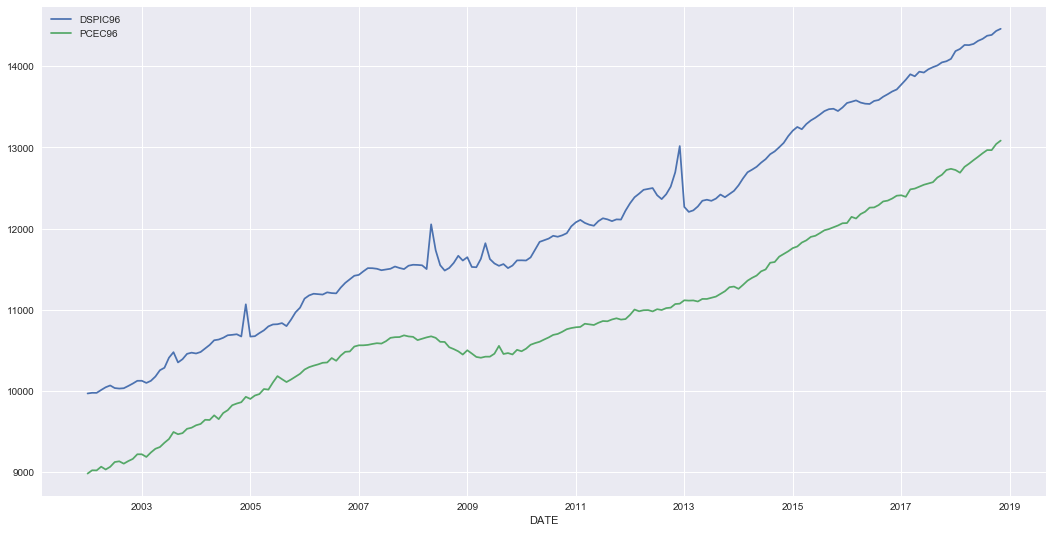

In [80]:
plt.close()
comb.plot()
plt.show()

In [81]:
print(comb.head())
print(comb.tail())

            DSPIC96  PCEC96
DATE                       
2002-01-01   9968.4  8981.7
2002-02-01   9976.4  9022.0
2002-03-01   9975.9  9020.6
2002-04-01  10011.3  9066.3
2002-05-01  10044.8  9031.8
            DSPIC96   PCEC96
DATE                        
2018-07-01  14336.4  12927.5
2018-08-01  14374.8  12966.5
2018-09-01  14385.0  12965.9
2018-10-01  14434.0  13040.8
2018-11-01  14460.5  13083.3


In [82]:
# difference in log is the growth rate.
gr = 100 * np.log(comb).diff()
gr.dropna(inplace=True)
gr.columns = ["GR_DSPIC", "GR_PCEC"]
print(gr.head())
print(gr.tail())

            GR_DSPIC   GR_PCEC
DATE                          
2002-02-01  0.080221  0.447687
2002-03-01 -0.005012 -0.015519
2002-04-01  0.354227  0.505339
2002-05-01  0.334063 -0.381256
2002-06-01  0.220766  0.365813
            GR_DSPIC   GR_PCEC
DATE                          
2018-07-01  0.170341  0.336283
2018-08-01  0.267492  0.301228
2018-09-01  0.070932 -0.004627
2018-10-01  0.340054  0.576007
2018-11-01  0.183426  0.325370


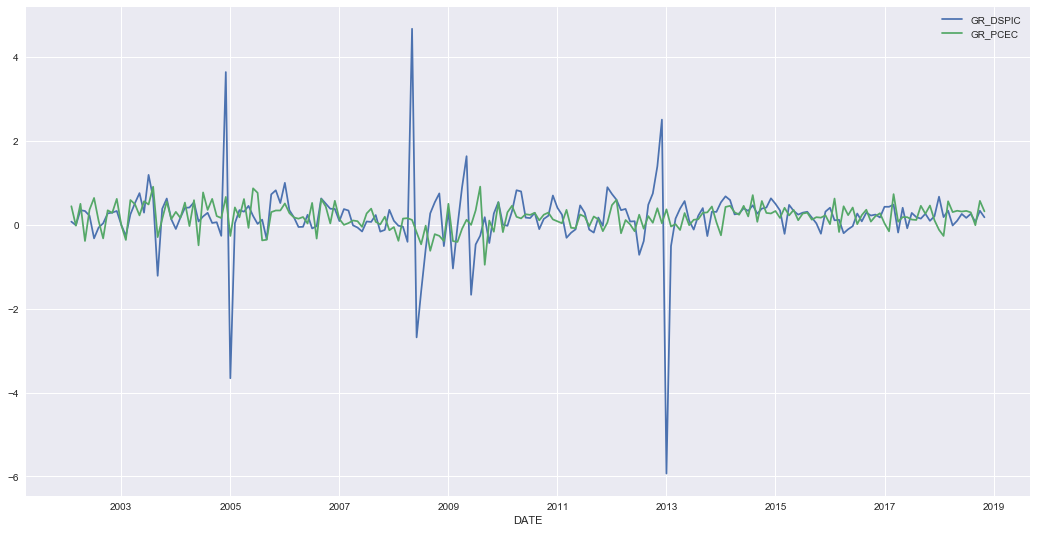

In [83]:
plt.close()
gr.plot()
plt.show()

In [84]:
y = gr["GR_PCEC"]
X = gr["GR_DSPIC"]
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                GR_PCEC   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     7.309
Date:                Sun, 13 Jan 2019   Prob (F-statistic):            0.00745
Time:                        02:11:01   Log-Likelihood:                -37.355
No. Observations:                 202   AIC:                             78.71
Df Residuals:                     200   BIC:                             85.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1735      0.021      8.213      0.0

In [85]:
gr2 = pd.concat([gr, gr.shift(1)], axis=1)
gr2.columns = ["GR_DSPIC", "GR_PCEC", "GR_DSPIC_L1", "GR_PCEC_L1"]
gr2.dropna(inplace=True)
print(gr2.head())
print(gr2.tail())

            GR_DSPIC   GR_PCEC  GR_DSPIC_L1  GR_PCEC_L1
DATE                                                   
2002-03-01 -0.005012 -0.015519     0.080221    0.447687
2002-04-01  0.354227  0.505339    -0.005012   -0.015519
2002-05-01  0.334063 -0.381256     0.354227    0.505339
2002-06-01  0.220766  0.365813     0.334063   -0.381256
2002-07-01 -0.318377  0.645465     0.220766    0.365813
            GR_DSPIC   GR_PCEC  GR_DSPIC_L1  GR_PCEC_L1
DATE                                                   
2018-07-01  0.170341  0.336283     0.263763    0.321065
2018-08-01  0.267492  0.301228     0.170341    0.336283
2018-09-01  0.070932 -0.004627     0.267492    0.301228
2018-10-01  0.340054  0.576007     0.070932   -0.004627
2018-11-01  0.183426  0.325370     0.340054    0.576007


In [86]:
y = gr2["GR_PCEC"]
X = gr2[["GR_DSPIC", "GR_DSPIC_L1"]]
X = sm.add_constant(X)
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                GR_PCEC   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     4.482
Date:                Sun, 13 Jan 2019   Prob (F-statistic):             0.0125
Time:                        02:11:01   Log-Likelihood:                -36.436
No. Observations:                 201   AIC:                             78.87
Df Residuals:                     198   BIC:                             88.78
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1648      0.022      7.516      

## Exercise 2 P76

In [87]:
cpi = pd.read_csv("./data/CPIAUCSL.csv", index_col=0, parse_dates=True)
tb = pd.read_csv("./data/TB3MS.csv", index_col=0, parse_dates=True)

In [88]:
print(cpi.describe())
print(tb.describe())

         CPIAUCSL
count  864.000000
mean   108.084134
std     76.330223
min     21.480000
25%     31.272500
50%     98.000000
75%    174.850000
max    252.876000
             TB3MS
count  1020.000000
mean      3.480539
std       3.159564
min       0.010000
25%       0.440000
50%       2.955000
75%       5.322500
max      16.300000


In [89]:
# Calculate inflation
inf = 100 * np.log(cpi).diff()
inf.dropna(inplace=True)
inf.columns = ["INFLATION"]
print(inf.describe())

        INFLATION
count  863.000000
mean     0.285656
std      0.343494
min     -1.786409
25%      0.098816
50%      0.244350
75%      0.441277
max      1.945243


In [90]:
# Expost real interst rate
comb = pd.concat([inf, tb], axis=1).dropna()
print(comb.tail())
ex_r = pd.DataFrame(comb["TB3MS"].values - comb["INFLATION"].values, index=comb.index)
ex_r.columns = ["EXPOST_IR"]
print(ex_r.tail())

            INFLATION  TB3MS
DATE                        
2018-08-01   0.222606   2.03
2018-09-01   0.058749   2.13
2018-10-01   0.330018   2.25
2018-11-01   0.019379   2.33
2018-12-01  -0.056565   2.37
            EXPOST_IR
DATE                 
2018-08-01   1.807394
2018-09-01   2.071251
2018-10-01   1.919982
2018-11-01   2.310621
2018-12-01   2.426565


In [91]:
comb3 = pd.concat([gr2, ex_r], axis=1)
comb3.dropna(inplace=True)
print(comb3.head())

            GR_DSPIC   GR_PCEC  GR_DSPIC_L1  GR_PCEC_L1  EXPOST_IR
DATE                                                              
2002-03-01 -0.005012 -0.015519     0.080221    0.447687   1.509495
2002-04-01  0.354227  0.505339    -0.005012   -0.015519   1.262822
2002-05-01  0.334063 -0.381256     0.354227    0.505339   1.618517
2002-06-01  0.220766  0.365813     0.334063   -0.381256   1.644305
2002-07-01 -0.318377  0.645465     0.220766    0.365813   1.457530


In [92]:
X = comb3[["GR_DSPIC", "EXPOST_IR"]]
X = sm.add_constant(X)
y = comb3[["GR_PCEC"]]
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                GR_PCEC   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     3.792
Date:                Sun, 13 Jan 2019   Prob (F-statistic):             0.0242
Time:                        02:11:03   Log-Likelihood:                -37.109
No. Observations:                 201   AIC:                             80.22
Df Residuals:                     198   BIC:                             90.13
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1645      0.026      6.363      0.0

## Exercise 7 P78

In [93]:
sp500 = pd.read_csv("./data/SP500.csv", index_col=0, parse_dates=True)
# missing data are labelled as '.', omit them.
sp500.replace(".", np.nan, inplace=True)
sp500.dropna(inplace=True)
sp500 = sp500.astype(np.float32)
log_sp500 = np.log(sp500)

In [94]:
print(sp500.describe())
print(log_sp500.describe())

             SP500
count  2518.000000
mean   1770.276611
std     565.376282
min     676.530029
25%    1281.262543
50%    1818.759949
75%    2126.604919
max    2930.750000
             SP500
count  2518.000000
mean      7.424698
std       0.335857
min       6.516977
25%       7.155601
50%       7.505910
75%       7.662282
max       7.983014


                 R
count  2517.000000
mean      0.043426
std       1.047123
min      -6.895828
25%      -0.355148
50%       0.059748
75%       0.528240
max       6.836653


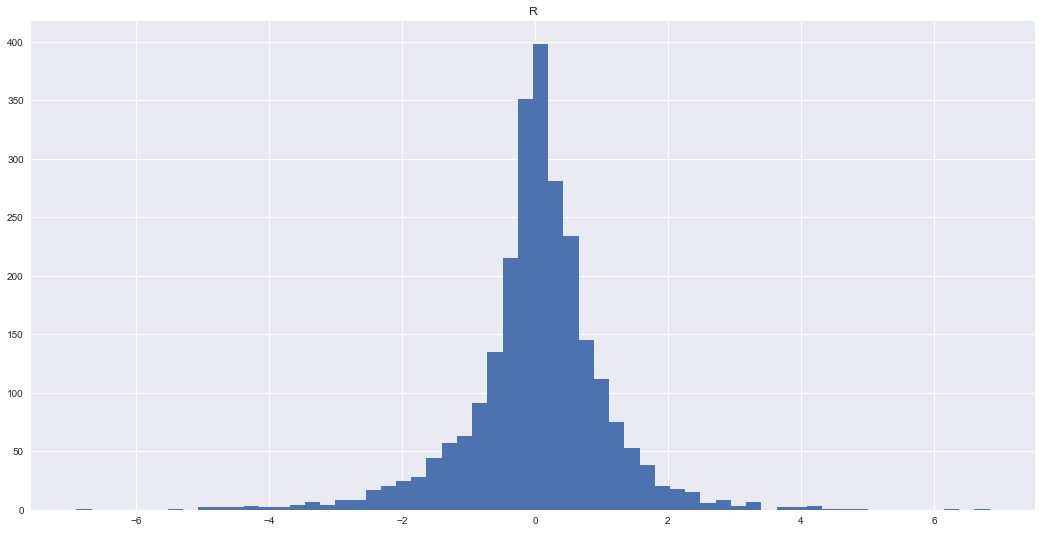

In [95]:
# (a)
rcParams["figure.figsize"] = (18, 9)
daily_return = 100 * log_sp500.diff()
daily_return.dropna(inplace=True)
daily_return.columns = ["R"]
# (b)
daily_return.hist(bins=60)
print(daily_return.describe())
plt.show()

In [96]:
# (c)
lags = [daily_return]
for i in [1, 2, 3, 4]:
    L = daily_return.shift(i)
    L.columns = [f"L{i}"]
    lags.append(L)
comb = pd.concat(lags, axis=1)
comb.dropna(inplace=True)
print(comb.head())

                   R        L1        L2        L3        L4
DATE                                                        
2009-01-20 -5.426216  0.753307  0.132847 -3.403234  0.175619
2009-01-21  4.257202 -5.426216  0.753307  0.132847 -3.403234
2009-01-22 -1.527834  4.257202 -5.426216  0.753307  0.132847
2009-01-23  0.536346 -1.527834  4.257202 -5.426216  0.753307
2009-01-26  0.553751  0.536346 -1.527834  4.257202 -5.426216


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


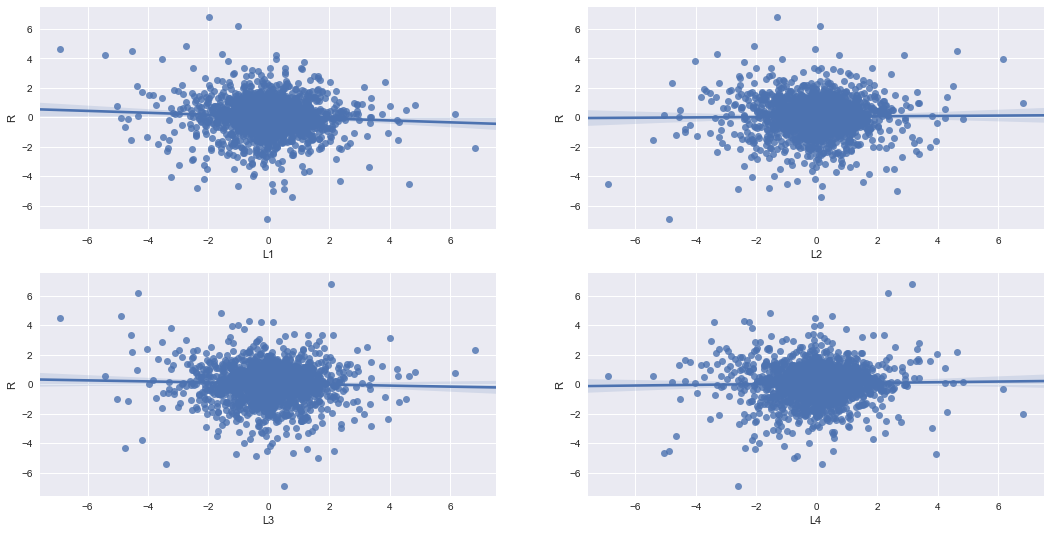

In [97]:
for i in [1, 2, 3, 4]:
    ax = plt.subplot(2, 2, i)
#     plt.scatter(comb[f"L{i}"], comb["SP500"])
    sns.regplot(x=f"L{i}", y="R", data=comb, ci=95)
    
plt.show()

## Exercise 8 P78 

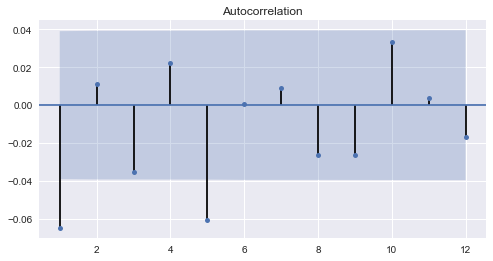

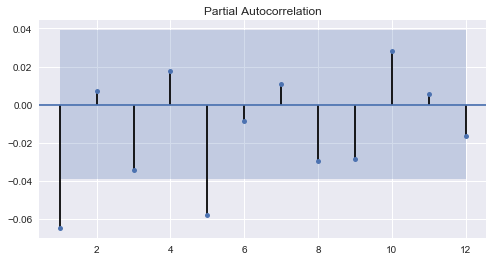

In [98]:
# (a)
rcParams["figure.figsize"] = (8, 4)
statsmodels.graphics.tsaplots.plot_acf(daily_return, lags=12, zero=False)
plt.show()
statsmodels.graphics.tsaplots.plot_pacf(daily_return, lags=12, zero=False)
plt.show()